# Abalone case study

# Data  Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. 

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name/ Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 




# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')


# Loading the Dataset

In [2]:
df=pd.read_csv("abalone.data.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df.shape # dimension of the dataset

(4177, 9)

From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings

In [7]:
df['Age'] = df['Rings']+1.5
#df.drop('Rings', axis = 1, inplace = True)

In [8]:
df.drop('Rings',axis=1,inplace=True)

In [9]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [10]:
df.describe() # Statistical summary

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [11]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [12]:
df['Age'].value_counts()


10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: Age, dtype: int64

In [13]:
# Checking the null values in the set
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

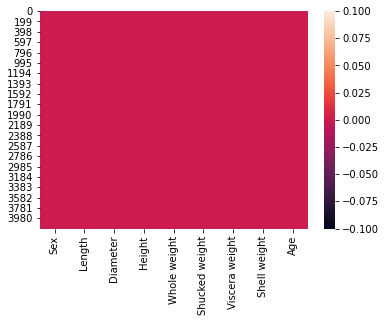

In [14]:
sns.heatmap(df.isnull())

There is no null values in the dataset

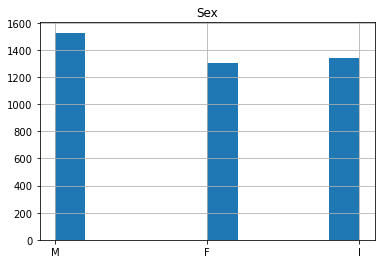

In [15]:
df["Sex"].hist(grid=True)# Univariate analysis
plt.title("Sex")
plt.show()


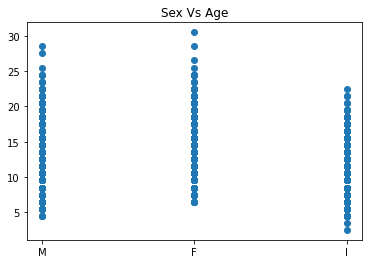

In [16]:
plt.scatter(df['Sex'],df['Age'])
plt.title("Sex Vs Age")
plt.show()

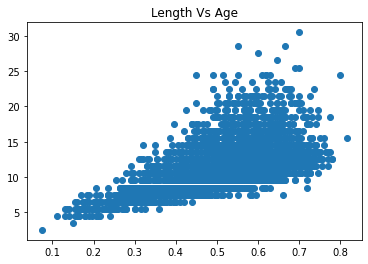

In [17]:
plt.scatter(df['Length'],df['Age'])
plt.title("Length Vs Age")
plt.show()
          
          

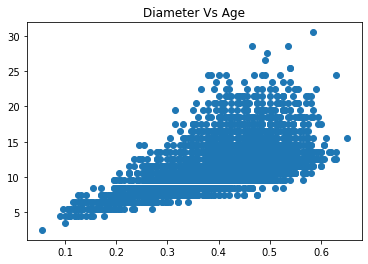

In [18]:
plt.scatter(df['Diameter'],df['Age'])
plt.title('Diameter Vs Age')
plt.show()

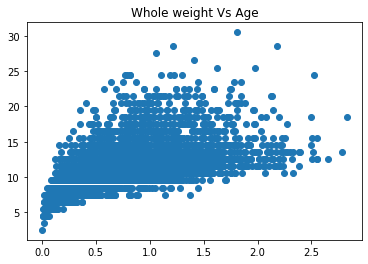

In [19]:
plt.scatter(df['Whole weight'],df['Age'])
plt.title('Whole weight Vs Age')
plt.show()

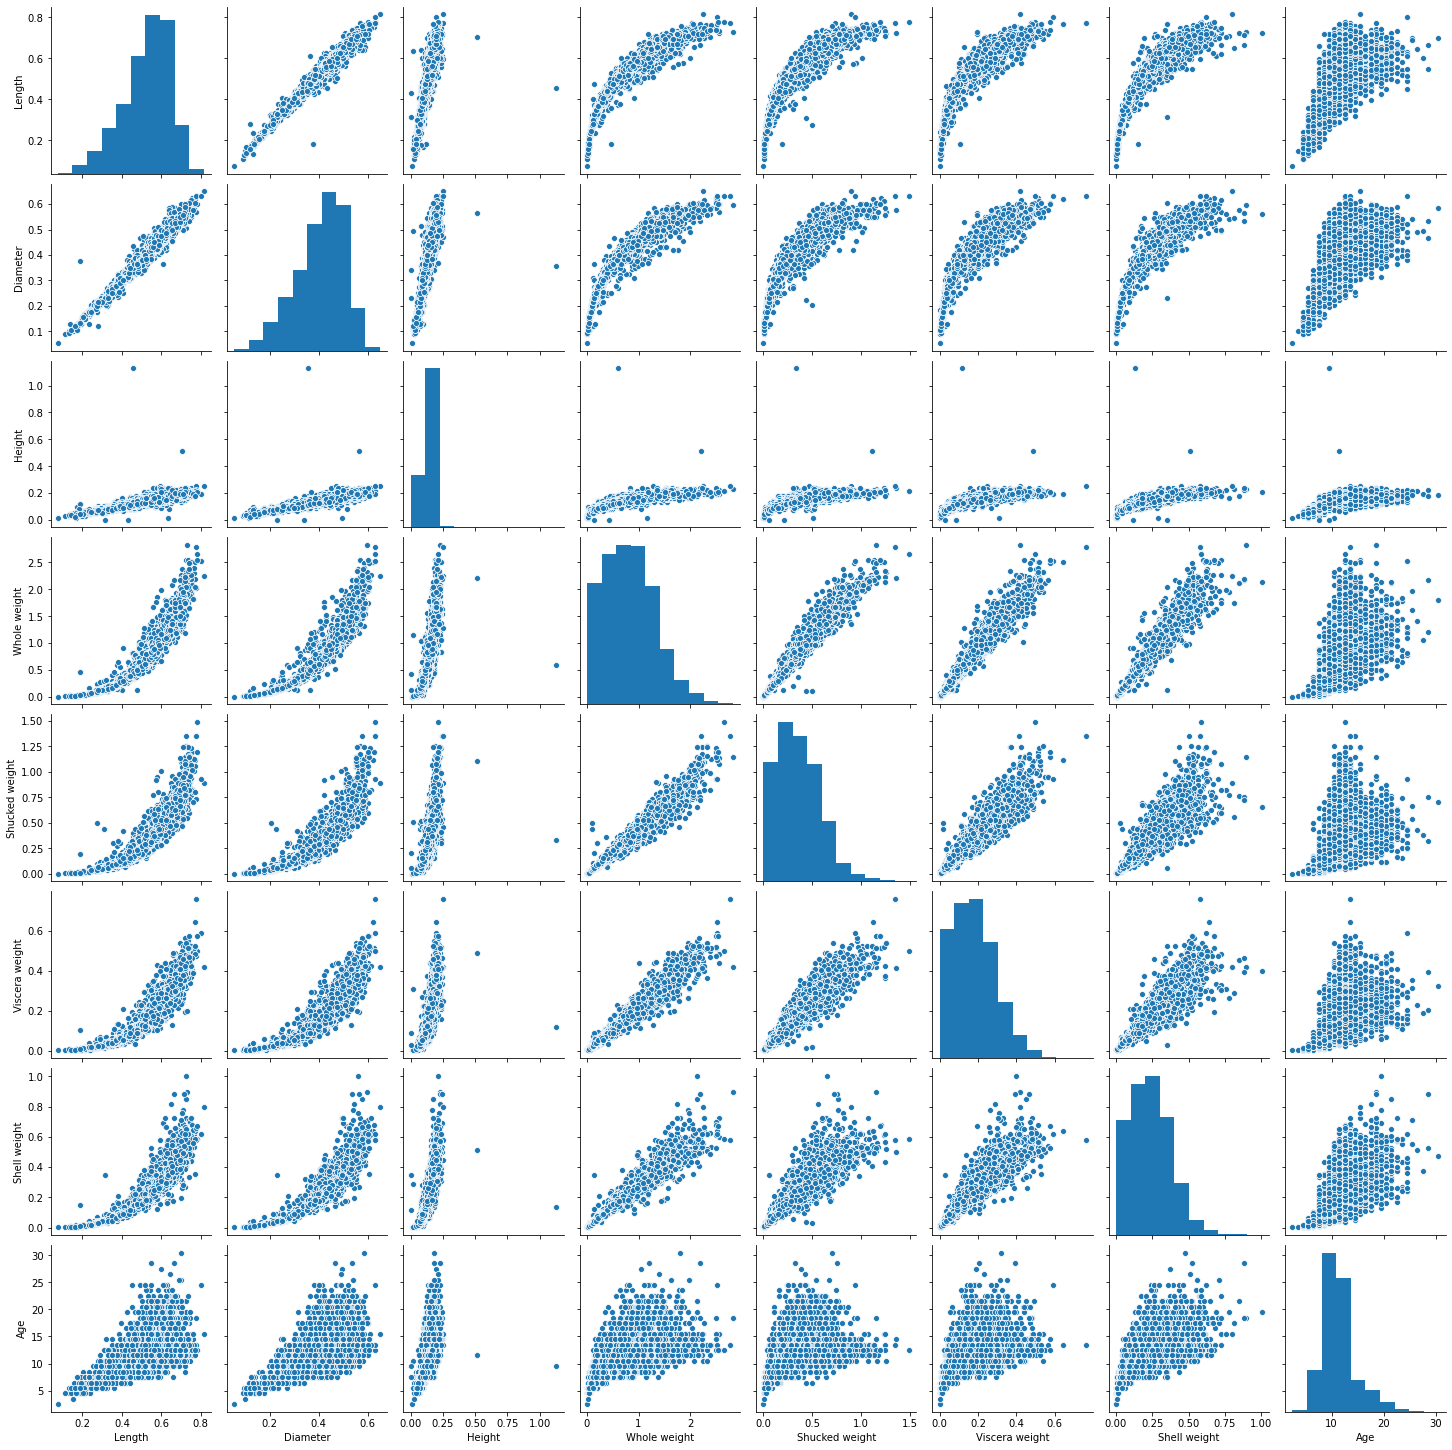

In [20]:
#Multi variate Analysis
sns.pairplot(df)
plt.show()

In [21]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

In [22]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


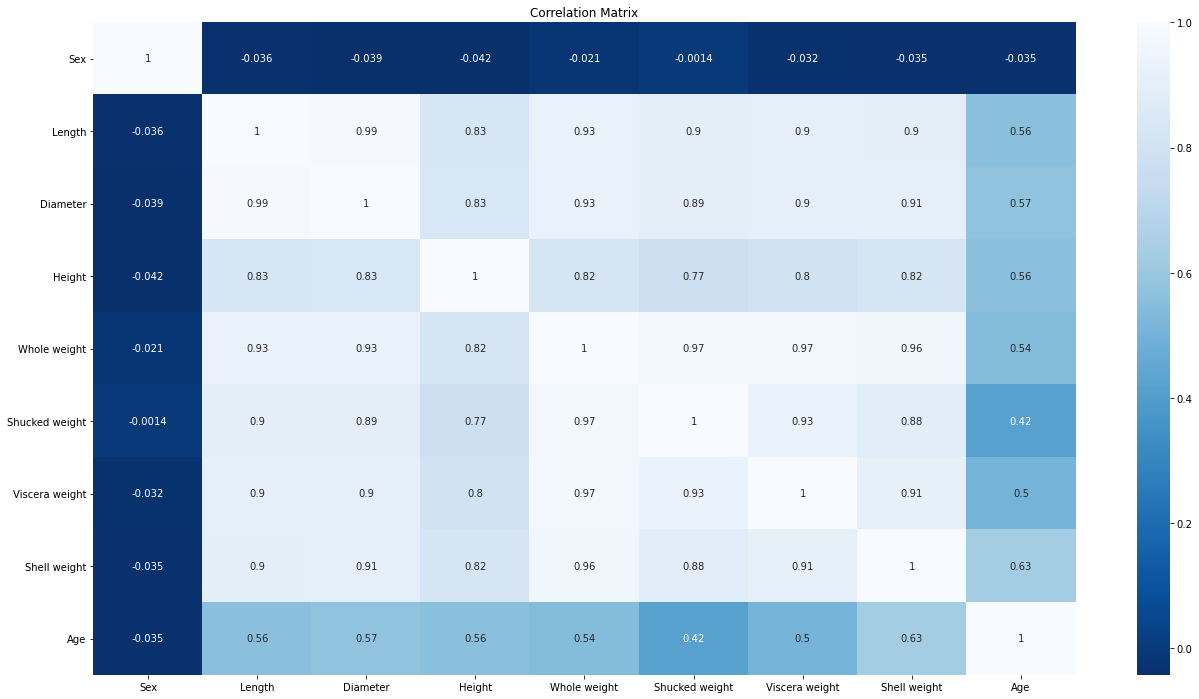

In [23]:
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True,cmap='Blues_r')
plt.title('Correlation Matrix')
plt.show()

All the independent variables except Sex have strong correlation with Age.

# Checking outliers

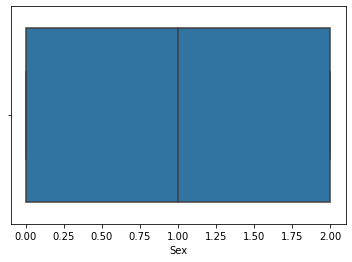

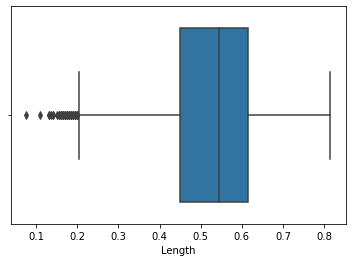

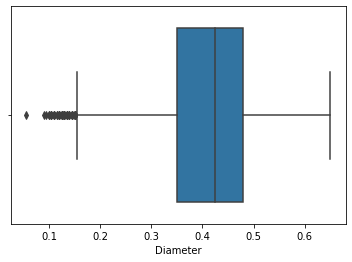

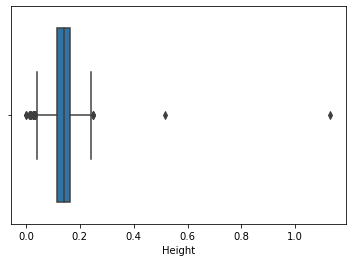

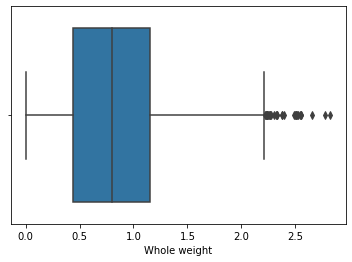

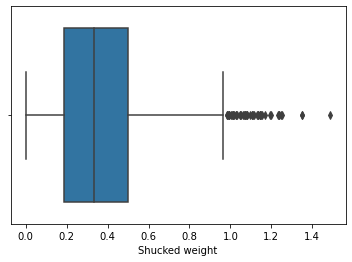

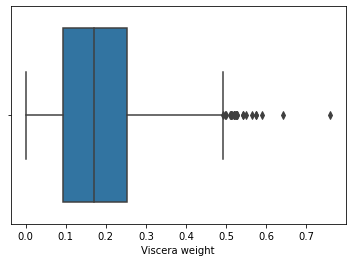

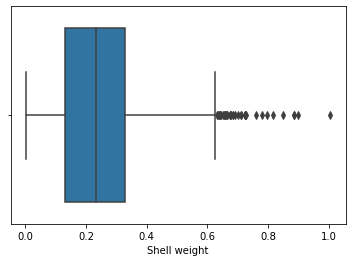

In [24]:
for i in ['Sex', 'Length', 'Diameter',
       'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']:
       
    
    sns.boxplot(df[i])
    plt.show()

In [25]:
#Splitting the independent and target variable in x and y
x=df.drop('Age',axis=1)
y=df['Age']

# Data distribution among all columns

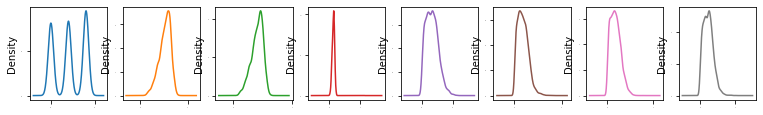

In [26]:
x.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()


In [27]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

We can see the skewness in the dataset.we can remove these skewness by using power_transform function.

In [28]:
df.drop('Sex',axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [30]:
df_new.skew()

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [31]:
x=df_new

In [32]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.127072,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,1.127072,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-1.307935,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,1.127072,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-0.009459,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,-1.307935,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,1.127072,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,1.127072,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,-1.307935,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [33]:
x.shape

(4177, 8)

In [34]:
y.shape

(4177,)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
#Applying standard scaling to get optimized result
sc=StandardScaler()
x=sc.fit_transform(x)

In [37]:
x

array([[ 1.12707158, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 1.12707158, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [-1.30793479, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 1.12707158,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [-1.30793479,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 1.12707158,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

# Finding Best Random state

In [38]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    rsc=r2_score(y_test,predrf)
    if rsc>maxAccu:
        maxAccu=rsc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.5951621473680748 on Random_state 265


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=265)       

In [40]:
x_train.shape

(2923, 8)

In [41]:
x_test.shape

(1254, 8)

In [42]:
y_train.shape

(2923,)

In [43]:
y_test.shape

(1254,)

In [44]:
LR=LinearRegression()

In [45]:
LR.fit(x_train,y_train)

LinearRegression()

In [46]:
LR.score(x_train,y_train)

0.5257095221115999

In [47]:
LR.coef_

array([ 0.01287442, -0.7191951 ,  0.41330389,  0.73572806,  5.88747778,
       -5.0460631 , -1.15275434,  1.65405645])

In [48]:
LR.intercept_

11.424053027676175

In [49]:
pred=LR.predict(x_test)

In [50]:
print('Predicted value and Actual value',pred,y_test)

Predicted value and Actual value [11.49852317  9.44061179 13.25805503 ... 11.88637218 11.81577746
  9.79686821] 1029    11.5
3440     8.5
1984    12.5
3237    19.5
1182    12.5
        ... 
1995     7.5
409      9.5
1644    11.5
2774    10.5
3537     7.5
Name: Age, Length: 1254, dtype: float64


In [51]:
print("error:")


print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.5328528669648982
Mean squared error: 4.244306468264685
Root mean squared error: 2.0601714657437338


In [52]:
#r2_score---coefficient of determination
print(r2_score(y_test,pred))

0.5951621473680748


# Regularization

In [53]:
#ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElaticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.5257067491479023


array([ 0.01276568, -0.71578737,  0.41047982,  0.73615232,  5.82638689,
       -5.01824571, -1.13838531,  1.67314738])

In [54]:
# Cross Validation for  LinearRegression
score=cross_val_score(LR,x,y,cv=5)
print('Score:',score)

print('Cross validation score',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(LR,x,y,cv=5)

print('y Prediction values')
print(y_pred)


Score: [0.44451358 0.21931524 0.5341733  0.51756742 0.4691144 ]
Cross validation score 0.43693678788044704
Standard deviation 0.11349729696552395
y Prediction values
[ 9.80590012  8.76949157 11.70301949 ... 12.67998875 10.78857113
 13.63235317]


In [55]:
from sklearn.svm  import SVR
sv=SVR()
sv.fit(x_train,y_train)
pred_y=sv.predict(x_test)
print(sv.score(x_train,y_train))

0.5274923414943751


In [56]:
#Cross validation score for SVR
score=cross_val_score(sv,x,y,cv=5)
print('Score:',score)

print('Cross validation score',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)

print('y Prediction values')
print(y_pred)


Score: [0.33159736 0.50406547 0.49775168 0.57881289 0.55271726]
Cross validation score 0.49298893037260044
Standard deviation 0.08616941200212143
y Prediction values
[10.09757239  9.36927982 11.69117083 ... 12.33540998 10.83462638
 12.90068903]


In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_y=knr.predict(x_test)
print(knr.score(x_train,y_train))

0.6487732380320006


In [59]:
score=cross_val_score(knr,x,y,cv=5)
print('Score:',score)

print('Cross validation score',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(knr,x,y,cv=5)

print('y Prediction values')
print(y_pred)


Score: [0.31131793 0.28594193 0.46457177 0.47772027 0.43687002]
Cross validation score 0.3952843845868001
Standard deviation 0.0804138311295859
y Prediction values
[10.1 10.3 11.9 ... 11.7 11.3 12.5]


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_y=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.931290374928148


In [62]:
score=cross_val_score(rf,x,y,cv=5)
print('Score:',score)

print('Cross validation score',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(rf,x,y,cv=5)

print('y Prediction values')
print(y_pred)


Score: [0.44115466 0.24353243 0.51619966 0.531892   0.46079064]
Cross validation score 0.4387138778944917
Standard deviation 0.10322339561416707
y Prediction values
[10.1   9.28 11.98 ... 13.1  11.88 12.82]


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_y=gb.predict(x_test)
print(gb.score(x_train,y_train))

0.653243752120898


In [65]:
score=cross_val_score(gb,x,y,cv=5)
print('Score:',score)

print('Mean scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(gb,x,y,cv=5)

print('y Prediction values')
print(y_pred)


Score: [0.4238294  0.29325269 0.5326316  0.57055174 0.49871265]
Mean scores 0.46379561601934094
Standard deviation 0.09801698685769412
y Prediction values
[10.11919811  9.71692818 12.4035893  ... 12.93908935 11.6458601
 12.65766721]


The minimum difference between accuracy and cross validation score is for SVR(3.45).so this is our best model. 

# Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
# Creating parameter list to pass in GridSearchCV

parameters={'kernel':['linear','rbf'],'degree':[1,10]}

In [68]:
GCV=GridSearchCV(SVR(),parameters,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [1, 10], 'kernel': ['linear', 'rbf']})

In [70]:
GCV.best_params_

{'degree': 1, 'kernel': 'rbf'}

In [71]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [72]:
r2_score(y_test,GCV_pred)

0.57504555592093

In [73]:
import joblib
    
joblib.dump(GCV.best_estimator_,"AbaloneSVR.obj")

p=joblib.load("AbaloneSVR.obj")

p.predict(x_test)


array([11.38795612,  9.10293538, 12.12701922, ..., 11.78663939,
       11.79011817,  9.26036316])

# Conclusion

In [74]:
import numpy as np
a=np.array(y_test)
predicted=np.array(sv.predict(x_test))
df_com=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))

In [75]:
df_com

,Original,Predicted
0,11.5,11.387956
1,8.5,9.102935
2,12.5,12.127019
3,19.5,12.311139
4,12.5,14.054958
...,...,...
1249,7.5,7.309928
1250,9.5,11.664718
1251,11.5,11.786639
1252,10.5,11.790118
